In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import time

# Directory and version specifications

In [124]:
from datetime import datetime

MODEL_TIMESTAMP = datetime.now().strftime("%Y-%m-%d__%H-%M-%S")

DATA_PATH = 'data/'

REPORTS_PATH = 'reports/ensembles/'
SAMPLE_GRAPH_RESULTS_PATH  = 'sample_graph_result/ensembles/'
TREE_PATH = 'tree/'

# Resolución de imágenes
resolution = 300
MODEL_TIMESTAMP

'2022-05-02__22-32-13'

# Download and Store Data

In [3]:
# for index in range(0,22):
#     index_str = str(index)

#     print(index_str)
    
#     if len(index_str) == 1:
#         index_str = '0' + index_str

#     print(index_str)

#     url = "https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_20{}.csv".format(index_str)
#     print(url)

#     FILE_NAME = "atp_matches_20{}.csv".format(index_str)

#     df = pd.read_csv(url, index_col=0, parse_dates=[0])
#     df.to_csv(DATA_PATH + FILE_NAME)

# # data_frame = pd.read_csv(DATA_PATH + FILE_NAME)

# Load Data

In [4]:
atp = pd.DataFrame()

years_index_20_22 = range(0,22)

for index in years_index_20_22:
    index_str = str(index)

    if len(index_str) == 1:
        index_str = '0' + index_str

    FILE_NAME = "atp_matches_20{}.csv".format(index_str)

    data_frame_iter = pd.read_csv(DATA_PATH + FILE_NAME)
    atp = pd.concat([atp, data_frame_iter])

pd.set_option('display.max_columns', None)
atp

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2000-301,Auckland,Hard,32,A,20000110,1,103163,1.0,NaN,Tommy Haas,R,188.0,GER,21.771389,101543,NaN,NaN,Jeff Tarango,L,180.0,USA,31.137577,7-5 4-6 7-5,3,R32,108.0,18.0,4.0,96.0,49.0,39.0,28.0,17.0,3.0,5.0,7.0,8.0,106.0,55.0,39.0,29.0,17.0,4.0,7.0,11.0,1612.0,63.0,595.0
1,2000-301,Auckland,Hard,32,A,20000110,2,102607,NaN,Q,Juan Balcells,R,190.0,ESP,24.558522,102644,NaN,NaN,Franco Squillari,L,183.0,ARG,24.386037,7-5 7-5,3,R32,85.0,5.0,3.0,76.0,52.0,39.0,13.0,12.0,5.0,6.0,5.0,10.0,74.0,32.0,25.0,18.0,12.0,3.0,6.0,211.0,157.0,49.0,723.0
2,2000-301,Auckland,Hard,32,A,20000110,3,103252,NaN,NaN,Alberto Martin,R,175.0,ESP,21.390828,102238,NaN,NaN,Alberto Berasategui,R,173.0,ESP,26.535250,6-3 6-1,3,R32,56.0,0.0,0.0,55.0,35.0,25.0,12.0,8.0,1.0,1.0,0.0,6.0,56.0,33.0,20.0,7.0,8.0,7.0,11.0,48.0,726.0,59.0,649.0
3,2000-301,Auckland,Hard,32,A,20000110,4,103507,7.0,NaN,Juan Carlos Ferrero,R,183.0,ESP,19.909651,103819,NaN,NaN,Roger Federer,R,185.0,SUI,18.422998,6-4 6-4,3,R32,68.0,5.0,1.0,53.0,28.0,26.0,15.0,10.0,0.0,0.0,11.0,2.0,70.0,43.0,29.0,14.0,10.0,6.0,8.0,45.0,768.0,61.0,616.0
4,2000-301,Auckland,Hard,32,A,20000110,5,102103,NaN,Q,Michael Sell,R,180.0,USA,27.381246,102765,4.0,NaN,Nicolas Escude,R,185.0,FRA,23.770021,0-6 7-6(7) 6-1,3,R32,115.0,1.0,2.0,98.0,66.0,39.0,14.0,13.0,6.0,11.0,8.0,8.0,92.0,46.0,34.0,18.0,12.0,5.0,9.0,167.0,219.0,34.0,873.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2722,2021-M-DC-2021-WG2-M-THA-DEN-01,Davis Cup WG2 R1: THA vs DEN,Hard,4,D,20210917,4,200416,NaN,NaN,August Holmgren,R,NaN,DEN,23.394935,106397,NaN,NaN,Wishaya Trongcharoenchaikul,R,NaN,THA,26.433949,6-4 6-4,3,RR,90.0,3.0,3.0,52.0,29.0,22.0,16.0,10.0,0.0,1.0,8.0,2.0,79.0,45.0,30.0,14.0,10.0,10.0,13.0,905.0,16.0,767.0,27.0
2723,2021-M-DC-2021-WG2-M-THA-DEN-01,Davis Cup WG2 R1: THA vs DEN,Hard,4,D,20210917,5,208937,NaN,NaN,Kasidit Samrej,R,NaN,THA,20.629706,134087,NaN,NaN,Johannes Ingildsen,R,NaN,DEN,24.202601,7-5 6-3,3,RR,88.0,6.0,6.0,58.0,28.0,21.0,13.0,11.0,3.0,7.0,5.0,8.0,76.0,43.0,24.0,13.0,10.0,5.0,11.0,1136.0,8.0,1546.0,2.0
2724,2021-M-DC-2021-WG2-M-TUR-LAT-01,Davis Cup WG2 R1: TUR vs LAT,Hard,4,D,20210918,1,123795,NaN,NaN,Altug Celikbilek,U,NaN,TUR,25.015743,207669,NaN,NaN,Robert Strombachs,U,NaN,GER,21.995893,7-6(4) 6-4,3,RR,124.0,6.0,8.0,80.0,34.0,25.0,23.0,11.0,6.0,8.0,3.0,5.0,97.0,50.0,34.0,20.0,11.0,6.0,9.0,170.0,427.0,671.0,38.0
2725,2021-M-DC-2021-WG2-M-TUR-LAT-01,Davis Cup WG2 R1: TUR vs LAT,Hard,4,D,20210918,2,117356,NaN,NaN,Cem Ilkel,R,185.0,TUR,26.064339,105208,NaN,NaN,Ernests Gulbis,R,190.0,LAT,33.037645,6-4 6-1,3,RR,65.0,2.0,2.0,41.0,27.0,23.0,7.0,9.0,0.0,1.0,1.0,5.0,45.0,21.0,16.0,7.0,8.0,2.0,7.0,176.0,408.0,196.0,359.0


In [5]:
# COLUMNS_TO_REMOVE = ["tourney_id", "tourney_name", "tourney_date",
#                      "match_num",
#                      "winner_id", "loser_id",
#                      "winner_seed", "loser_seed",
#                      "winner_name", "loser_name",
#                      "winner_ioc", "loser_loc",
#                      "winner_rank", "loser_rank",
#                      "winner_rank_points", "loser_rank_points",
#                      "round"]

# Clean Dataset

In [6]:
# Vamos a eliminar las variables que son identificadores, nombres etc
# Incluimos en el drop las siguientes variables que tienen muchos registros NaN
# quitaremos las columna de score
df_regression = atp


COLUMNS_TO_REMOVE = ['tourney_id', 'tourney_name', 'tourney_date',
                     'winner_name', 'loser_name',
                     'winner_entry', 'loser_entry',
                     'winner_seed', 'loser_seed',
                     'winner_id', 'loser_id',
                     'score']

df_regression = df_regression.drop(COLUMNS_TO_REMOVE, axis = 1) 
df_regression = df_regression.dropna()
df_regression = df_regression.drop_duplicates()

# Crearemos dos formulas para calculos del ganador y el perdedor para evitar la correlación de estas variables, tambien haremos un drop de estas variables.
df_regression['w_calculation'] = df_regression['w_svpt'] + df_regression['w_1stIn'] + df_regression['w_1stWon'] + df_regression['w_2ndWon'] + df_regression['w_SvGms']
df_regression['l_calculation'] = df_regression['l_svpt'] + df_regression['l_1stIn'] + df_regression['l_1stWon'] + df_regression['l_2ndWon'] + df_regression['l_SvGms']

df_regression = df_regression.drop(['w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms'], axis = 1) 

df_regression = df_regression._get_numeric_data() #drop non-numeric cols

# Split Data

In [7]:
from sklearn.model_selection import train_test_split

X = df_regression.drop('minutes', axis = 1) 
y = df_regression['minutes']

#X = scale(X)
#y = scale(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Para Clasificación de:

- Tipo de pista: `l_1stWon`, `winner_ht`, `loser_ht`, `w_1stWon`, `l_1stWon`
- Nivel de torneo: `Draw_size`, `winner_rank_points`, `loser_rank_points`, `loser_rank`, `winner_rank`

# Ensembles

Los ensembles son técnicas que permiten combinar las predicciones de distintos modelos con el objetivo de aumentar la prediccción de los resultados.
Existen distintas técnicas a aplicar dentro de los ensembles

Lo primero será buscar el Árbol de regresión que más accuracy nos dé mediante cross-validation para usarlo en el proceso de Bagging.

In [8]:
from sklearn.tree import DecisionTreeRegressor

best_params = {'criterion': 'absolute_error',
               'max_depth': 7,
               'max_features': None,
               'min_weight_fraction_leaf': 0.0,
               'splitter': 'best'}

decision_tree = DecisionTreeRegressor()
decision_tree.set_params(**best_params)

DecisionTreeRegressor(criterion='absolute_error', max_depth=7)

Inicializamos un diccionariol ´info´ donde almacenaremos toda la información relacionada con los ensembles, sus resultados, su tiempo de ejecución, el nombre del ensemble, etc.

In [9]:
info = {}

## Bagging

Bootstrap Aggregation o Bagging es una técnica que permite utilizar el resampling Bootstrap para consturir ensembles y poder utilizar varios conjuntos de datos para cada uno de los modelos pertenecientes a la arquitectura ensemble diseñada. Los modelos que se utilzarán en esta arquitectura serán todos el mismo, con la única diferencia de haberlos entrenado con distintos conjuntos de datos.

En el caso de la regresión, esta técnica permite calcular la media de las prediccciones de cada uno de los modelos entrenados mediante Bootstrap para obtener un resultado final que dependa de todos los modelos.


[Referencia](https://machinelearningmastery.com/bagging-ensemble-with-python/)

### Definition

In [10]:
from sklearn.ensemble import BaggingRegressor

MODEL_NAME = 'bagging'
info[MODEL_NAME] = {}
info[MODEL_NAME]['model_name'] = MODEL_NAME

num_models = 10
bagging = BaggingRegressor(decision_tree,
                           n_estimators = num_models,
                           max_samples  = 0.5,
                           max_features = 0.5)

### Training

Entrenamos el ensemble Bagging y anotamos el tiempo de ejecución.

In [11]:
start = time.time()

bagging_regressor = bagging.fit(X_train, y_train)

end = time.time()

ellapsed_time = round(end - start, 2)

info[MODEL_NAME]['time'] = ellapsed_time

print(f"Done in {ellapsed_time} (s)")

Done in 105.17 (s)


### Metrics

In [12]:
from sklearn.metrics import mean_squared_error

y_pred = bagging_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
info[MODEL_NAME]['mse'] = mse

print("MSE: ", info[MODEL_NAME]['mse'])

rmse = mean_squared_error(y_true  = y_test,
                          y_pred  = y_pred,
                          squared = False
                        )
info[MODEL_NAME]['rmse'] = rmse

print("RMSE: ", info[MODEL_NAME]['rmse'])

score = bagging_regressor.score(X_test, y_test)
info[MODEL_NAME]['score'] = score

print("R-squared:", info[MODEL_NAME]['score']) 

MSE:  321.6553371425969
RMSE:  17.934752218600536
R-squared: 0.8097810636653942


### Graphic Results

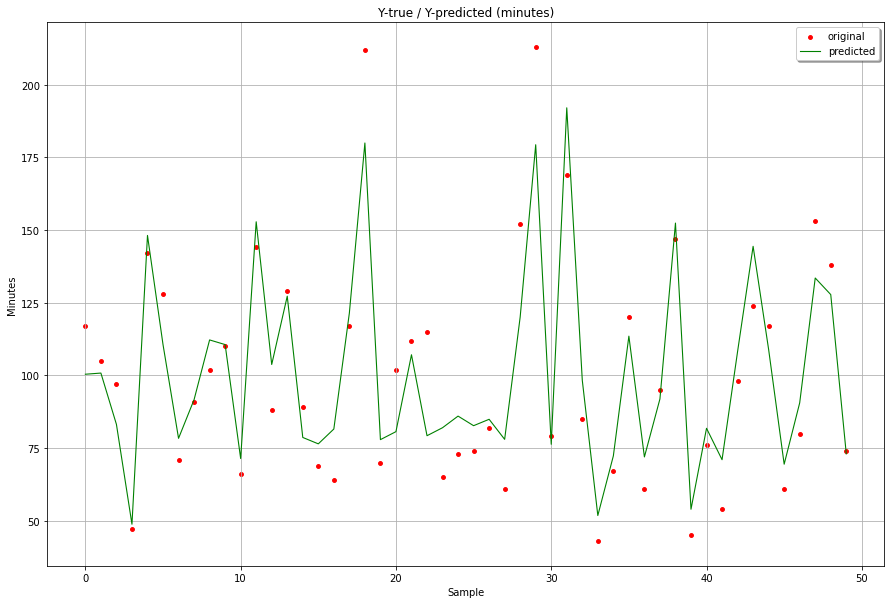

In [13]:
n_samples = range(len(y_test[:50]))

info[MODEL_NAME]['y_pred'] = y_pred[:50]

# plt.plot(x, y, marker="o", markersize=20, markeredgecolor="red", markerfacecolor="green")
plt.figure(figsize=(15,10))  # set plot size (denoted in inches)

plt.scatter(n_samples, y_test[:50], s = 15, color = 'red', label = "original")
plt.plot(n_samples, y_pred[:50], linewidth = 1.1, color = 'green', label = "predicted")

plt.title("Y-true / Y-predicted (minutes)")
plt.xlabel('Sample')
plt.ylabel('Minutes')

plt.legend(loc = 'best',
           fancybox = True,
           shadow = True)

GRAPH_PATH = f"{SAMPLE_GRAPH_RESULTS_PATH}{MODEL_NAME}/"
FILE_NAME  = f"{MODEL_NAME}_{MODEL_TIMESTAMP}.png"

plt.grid(True)
plt.savefig(GRAPH_PATH + FILE_NAME, dpi = 100)
plt.show()

# Save Confusion Matrix image
GRAPH_PATH = f"{SAMPLE_GRAPH_RESULTS_PATH}{MODEL_NAME}/"
FILE_NAME  = f"{MODEL_NAME}_{MODEL_TIMESTAMP}.png"

## Boosting

### ADABoost

AdaBoost utiliza múltiples weak learners (árboles de decisión de un nivel) que son agregados secuencialmente al conjunto de modelos, con el objetivo de que cada uno de estos árboles minimice el error producido por el anterior modelo.

Esto se consigue asignando una serie de pesos (ponderación) a cada una de las muestras que estén clasificadas erróneamente (clasificación) o que tengan un error alto (regresión).

[Referencia](https://machinelearningmastery.com/adaboost-ensemble-in-python/)

#### Definition

In [14]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression

MODEL_NAME = 'adaboost'
info[MODEL_NAME] = {}
info[MODEL_NAME]['model_name'] = MODEL_NAME

num_models = 10

ada_boosting_regresor = AdaBoostRegressor()

#### Training

Entrenamos el ensemble Ada Boost y anotamos el tiempo de ejecución.

In [15]:
# from sklearn.model_selection import cross_val_score

# ada_boost_regresor = AdaBoostRegressor()

# search_grid = {'n_estimators': [500,1000,2000],
#                'learning_rate': [.001,0.01,.1],
#                'random_state': [1]
#               }

# search = GridSearchCV(estimator= ada_boost_regresor,
#                       param_grid = search_grid,
#                       scoring = 'neg_mean_squared_error',
#                       n_jobs = 1,
#                       cv = 5)

# search.fit(X,y)
# search.best_params_

In [16]:
start = time.time()

ada_boosting_regresor.fit(X, y)

end = time.time()

ellapsed_time = round(end - start, 2)
info[MODEL_NAME]['time'] = ellapsed_time

print(f"Done in {ellapsed_time} (s)")

Done in 6.62 (s)


#### Metrics

In [17]:
y_pred = ada_boosting_regresor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
info[MODEL_NAME]['mse'] = mse

print("MSE: ", info[MODEL_NAME]['mse'])

rmse = mean_squared_error(y_true  = y_test,
                          y_pred  = y_pred,
                          squared = False
                        )
info[MODEL_NAME]['rmse'] = rmse

print("RMSE: ", info[MODEL_NAME]['rmse'])

score = ada_boosting_regresor.score(X_test, y_test)
info[MODEL_NAME]['score'] = score

print("R-squared:", info[MODEL_NAME]['score']) 

MSE:  450.8136927803597
RMSE:  21.2323736963242
R-squared: 0.7334000365498693


#### Graphic Results

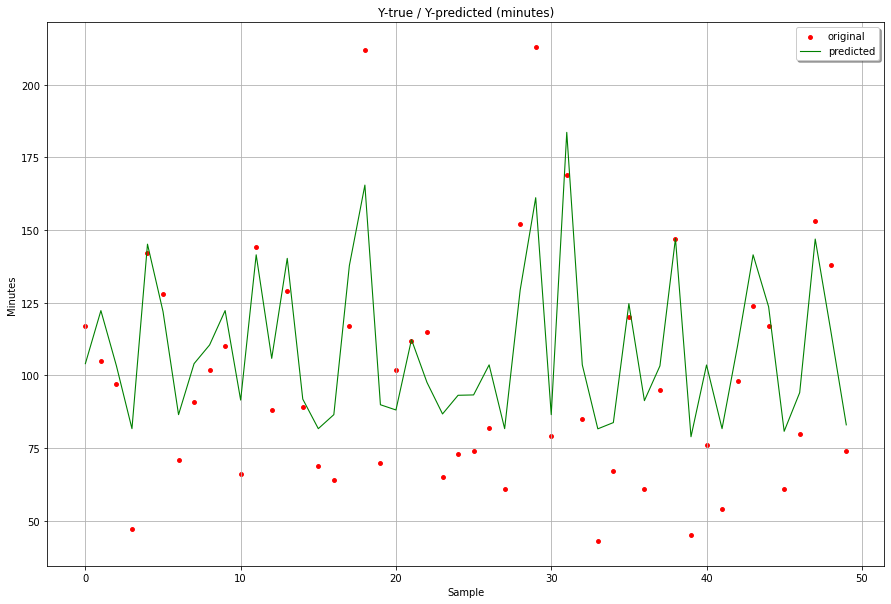

In [18]:
n_samples = range(len(y_test[:50]))

info[MODEL_NAME]['y_pred'] = y_pred[:50]

# plt.plot(x, y, marker="o", markersize=20, markeredgecolor="red", markerfacecolor="green")
plt.figure(figsize=(15,10))  # set plot size (denoted in inches)

plt.scatter(n_samples, y_test[:50], s = 15, color = 'red', label = "original")
plt.plot(n_samples, y_pred[:50], linewidth = 1.1, color = 'green', label = "predicted")

plt.title("Y-true / Y-predicted (minutes)")
plt.xlabel('Sample')
plt.ylabel('Minutes')

plt.legend(loc='best',fancybox = True, shadow = True)

# Save Confusion Matrix image
GRAPH_PATH = f"{SAMPLE_GRAPH_RESULTS_PATH}boosting/{MODEL_NAME}/"
FILE_NAME  = f"{MODEL_NAME}_{MODEL_TIMESTAMP}.png"

plt.grid(True)
plt.savefig(GRAPH_PATH + FILE_NAME, dpi = 100)
plt.show()

### Gradient Boosting Regressor

Al igual que en el caso del AdaBoost, utiliza la técnica Boosting para entrenar los modelos, es decir, trata de minimizar los residuos de los modelos anteriores. Sin embargo, utiliza el método de Descenso por Gradiente en lugar de la asignación de pesos como en el caso anterior.

[Referencia](https://www.cienciadedatos.net/documentos/py09_gradient_boosting_python.html)

#### Definition

In [19]:
from sklearn.ensemble import GradientBoostingRegressor

MODEL_NAME = 'gradientboost'
info[MODEL_NAME] = {}
info[MODEL_NAME]['model_name'] = MODEL_NAME

learning_rate = 0.8
num_models = 10

gradient_boosting = GradientBoostingRegressor(criterion = best_params['criterion'],
                                              max_depth = best_params['max_depth'],
                                              n_estimators  = num_models)

#### Training

Entrenamos el ensemble Gradient Boosting y anotamos el tiempo de ejecución.

In [20]:
start = time.time()

gradient_boosting_regressor = gradient_boosting.fit(X_train, y_train)

end = time.time()

ellapsed_time = round(end - start, 2)
info[MODEL_NAME]['time'] = ellapsed_time

print(f"Done in {ellapsed_time} (s)")

/home/luis/anaconda3/envs/TFM/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:1854: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  warnings.warn(


Done in 1305.89 (s)


#### Metrics

In [21]:
y_pred = gradient_boosting.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
info[MODEL_NAME]['mse'] = mse

print("MSE: ", info[MODEL_NAME]['mse'])

rmse = mean_squared_error(y_true  = y_test,
                          y_pred  = y_pred,
                          squared = False
                        )
info[MODEL_NAME]['rmse'] = rmse

print("RMSE: ", info[MODEL_NAME]['rmse'])

score = gradient_boosting.score(X_test, y_test)
info[MODEL_NAME]['score'] = score

print("R-squared:", info[MODEL_NAME]['score']) 

MSE:  431.2731006418407
RMSE:  20.767115847941927
R-squared: 0.7449558549142001


#### Graphic Results

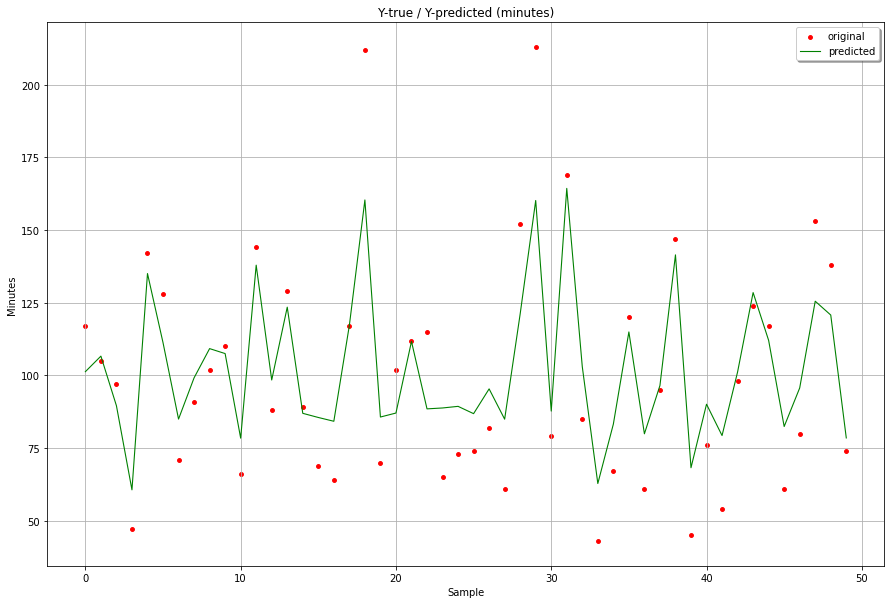

In [22]:
n_samples = range(len(y_test[:50]))

info[MODEL_NAME]['y_pred'] = y_pred[:50]

# plt.plot(x, y, marker="o", markersize=20, markeredgecolor="red", markerfacecolor="green")
plt.figure(figsize=(15,10))  # set plot size (denoted in inches)

plt.scatter(n_samples, y_test[:50], s = 15, color = 'red', label = "original")
plt.plot(n_samples, y_pred[:50], linewidth = 1.1, color = 'green', label = "predicted")

plt.title("Y-true / Y-predicted (minutes)")
plt.xlabel('Sample')
plt.ylabel('Minutes')

plt.legend(loc='best',fancybox = True, shadow = True)

# Save Confusion Matrix image
GRAPH_PATH = f"{SAMPLE_GRAPH_RESULTS_PATH}boosting/{MODEL_NAME}/"
FILE_NAME  = f"{MODEL_NAME}_{MODEL_TIMESTAMP}.png"

plt.grid(True)
plt.savefig(GRAPH_PATH + FILE_NAME, dpi = 100)
plt.show()

## Stacking

Stacking permite utilizar distintas tipologías de modelos para crear una arquitectura que combine las predicciones de éstos.

A diferencia del Bagging, el Stacking nos da la flexibilidad de explorar distintos modelos en lugar de siempre el mismo.

Es por esto que en esta sección crearemos un Ensemble Stacking con los siguientes modelos:
- **KNeighborsRegressor**
- **DecisionTreeRegressor**
- **SVR**

[Referencia](https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/)

### Definition

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor


MODEL_NAME = 'stacking'
info[MODEL_NAME] = {}
info[MODEL_NAME]['model_name'] = MODEL_NAME

# define the base models
base_models = list()
base_models.append(('knn', KNeighborsRegressor(n_neighbors = 3)))
base_models.append(('cart', DecisionTreeRegressor()))
base_models.append(('svm', SVR()))

# define meta learner model
meta_learner = LinearRegression()

# define the stacking ensemble
stacking = StackingRegressor(estimators = base_models,
                             final_estimator = meta_learner,
                             cv = 5)

### Training

Entrenamos el ensemble Stacking y anotamos el tiempo de ejecución.

In [24]:
start = time.time()

stacking_regressor = stacking.fit(X_train, y_train)

end = time.time()

ellapsed_time = round(end - start, 2)
info[MODEL_NAME]['time'] = ellapsed_time

print(f"Done in {ellapsed_time} (s)")

Done in 1067.05 (s)


### Metrics

In [25]:
from sklearn.metrics import mean_squared_error

y_pred = stacking_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
info[MODEL_NAME]['mse'] = mse

print("MSE: ", info[MODEL_NAME]['mse'])

rmse = mean_squared_error(y_true  = y_test,
                          y_pred  = y_pred,
                          squared = False
                        )
info[MODEL_NAME]['rmse'] = rmse

print("RMSE: ", info[MODEL_NAME]['rmse'])


score = stacking_regressor.score(X_test, y_test)
info[MODEL_NAME]['score'] = score

print("R-squared:", info[MODEL_NAME]['score'])

MSE:  351.4789201566179
RMSE:  18.74777107169324
R-squared: 0.792144141209794


### Graphic Results

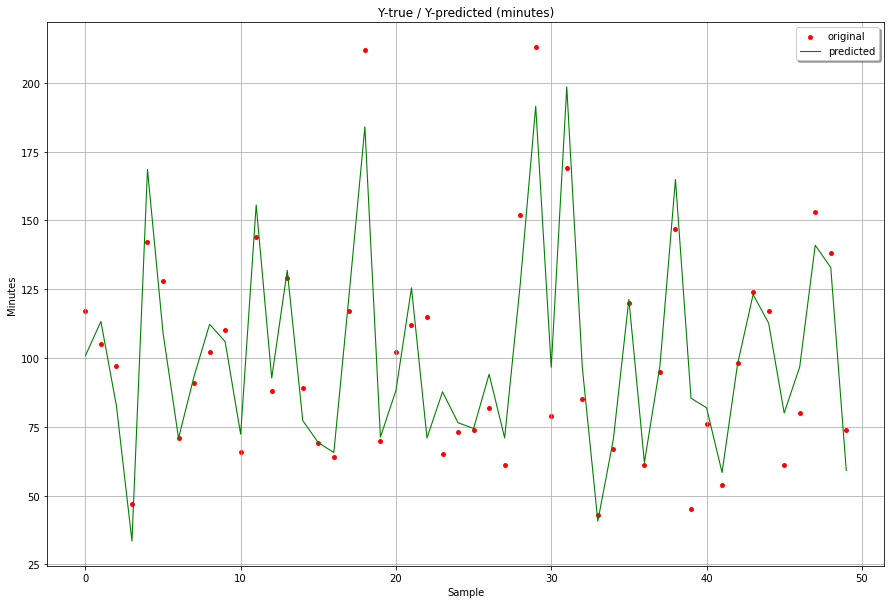

In [130]:
n_samples = range(len(y_test[:50]))

info[MODEL_NAME]['y_pred'] = y_pred[:50]

# plt.plot(x, y, marker="o", markersize=20, markeredgecolor="red", markerfacecolor="green")
plt.figure(figsize=(15,10))  # set plot size (denoted in inches)

plt.scatter(n_samples, y_test[:50], s = 15, color = 'red', label = "original")
plt.plot(n_samples, y_pred[:50], linewidth = 1.1, color = 'green', label = "predicted")

plt.title("Y-true / Y-predicted (minutes)")
plt.xlabel('Sample')
plt.ylabel('Minutes')

plt.legend(loc='best',fancybox = True, shadow = True)

# Save Confusion Matrix image
GRAPH_PATH = f"{SAMPLE_GRAPH_RESULTS_PATH}{MODEL_NAME}/"
FILE_NAME  = f"{MODEL_NAME}_{MODEL_TIMESTAMP}.png"

plt.grid(True)
plt.savefig(GRAPH_PATH + FILE_NAME, dpi = 100)
plt.show()

# Reports

A continuación analizaremos los resultados de los ensembles obtenidos, centrándonos concretamente en:

- **Tiempo**: tiempo empleado en entrenar el ensemble.
- **Mean Squared Error (MSE)**: Error cuadrático medio de las predicciones respecto a su valor verdadero.
- **Root-mean-square deviation (RMSE)**: Raíz cuadrada del error cuadrático medio o MSE.
- **Score**: 

In [132]:
FEATURES = ['model_name', 'time', 'mse', 'rmse', 'score']
summary_dataframe = pd.DataFrame(columns = FEATURES)

for key in info:
    row = info[key]
    fields = []
    for feature in row:
        if (feature in FEATURES):
            fields.append(row[feature])

    row_series = pd. Series(fields, index = summary_dataframe.columns)
    summary_dataframe = summary_dataframe.append(row_series, ignore_index = True)

SAVE_PATH =  f"{REPORTS_PATH}{MODEL_TIMESTAMP}.csv"


summary_dataframe.to_csv(SAVE_PATH, index = True)
summary_dataframe.style.highlight_max(subset = 'time', color='#cd4f39')\
                       .highlight_min(subset = 'mse', color='#lightgreen')


/tmp/ipykernel_7372/1063005834.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_dataframe = summary_dataframe.append(row_series, ignore_index = True)
/tmp/ipykernel_7372/1063005834.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_dataframe = summary_dataframe.append(row_series, ignore_index = True)
/tmp/ipykernel_7372/1063005834.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_dataframe = summary_dataframe.append(row_series, ignore_index = True)
/tmp/ipykernel_7372/1063005834.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_dataframe = summary_dataframe.append(row_series, ignore_index = Tr

,model_name,time,mse,rmse,score
0,bagging,105.170000,321.655337,17.934752,0.809781
1,adaboost,6.620000,450.813693,21.232374,0.733400
2,gradientboost,1305.890000,431.273101,20.767116,0.744956
3,stacking,1067.050000,351.478920,18.747771,0.792144


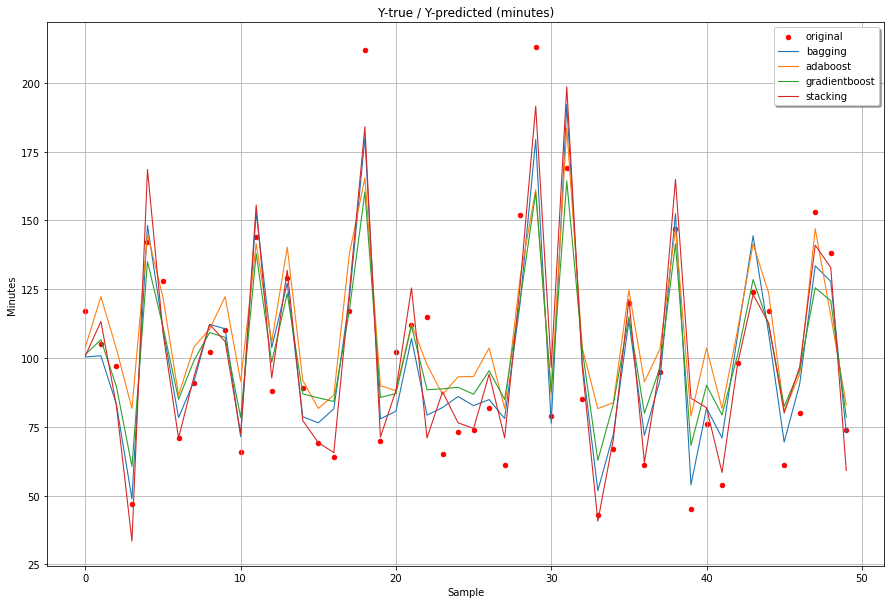

In [131]:
plt.figure(figsize=(15,10))  # set plot size (denoted in inches)

plt.scatter(n_samples, y_test[:50], s = 20, color = 'red', label = "original")

for key in info:
    y_pred = info[key]['y_pred']
    model_name = info[key]['model_name']
    plt.plot(n_samples, y_pred, linewidth = 1.1, label = model_name)

plt.title("Y-true / Y-predicted (minutes)")
plt.xlabel('Sample')
plt.ylabel('Minutes')

plt.legend(loc = 'best',
           fancybox = True,
           shadow = True)

GRAPH_PATH = f"{SAMPLE_GRAPH_RESULTS_PATH}/"
FILE_NAME  = f"{MODEL_TIMESTAMP}.png"

plt.grid(True)
plt.savefig(GRAPH_PATH + FILE_NAME, dpi = 100)
plt.show()

# Conclusiones

Como hemos podido comprobar, es posible aplicar distintas técnicas de ensembles a un problema, concretamente:
- Bagging
- Boosting
    - AdaBoost
    - Gradient Boosting Regressor
- Stacking

Después de haber probado las distintas arquitecturas, los mejores resultados se han obtenido en MEJORMODELO con un RMSE de RMSEMEJOR con respecto a RMSE1 de MODELO1, RMSE2 MODELO2 y RMSE3 del MODELO3 respectivamente.
    

Por motivos de tiempo de ejecución no se han podido testar distintas combinaciones de modelos a la hora de construir los ensembles, por lo que se propone como trabajos futuros la implementación y el estudio de distintas arquitecturas que permitan minimizar aún más el error producido en la regresión y, por ende, mejorar la precisión de los resultados.